# 3 Set Up


### (Added: DE gene list output for network analysis, canonical dataset for GSVA)

In [1]:
library(limma)
#library(Glimma)
library(edgeR)
library(Mus.musculus)
library(WebGestaltR)
library(gplots)

library(GSVA)
library(GSVAdata)
library(GSEABase)
library(Biobase)
#library(genefilter)
library(RColorBrewer)
library(splitstackshape)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, so

# 4 Data packaging
# 4.1 Reading in count-data

In [2]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("splitstackshape")

In [3]:
files <- c("SRR2140730.genes.results",
           "SRR2140731.genes.results",
           "SRR2140732.genes.results",
           "SRR2140733.genes.results",
           "SRR2140734.genes.results",
           "SRR2140735.genes.results",
           "SRR2140736.genes.results",
           "SRR2140737.genes.results")

In [4]:
read.delim(files[1], nrow=10, header=TRUE)

gene_id,transcript_id.s.,length,effective_length,expected_count,TPM,FPKM
ENSMUSG00000000001,ENSMUST00000000001,3262.00,3218.18,2642,99.05,56.25
ENSMUSG00000000003,"ENSMUST00000000003,ENSMUST00000114041",799.50,755.68,0,0.00,0.00
ENSMUSG00000000028,"ENSMUST00000000028,ENSMUST00000096990,ENSMUST00000115585",1875.70,1831.88,349,22.98,13.05
ENSMUSG00000000031,"ENSMUST00000132294,ENSMUST00000136359,ENSMUST00000140716,ENSMUST00000149974,ENSMUST00000152754",1268.60,1224.78,0,0.00,0.00
ENSMUSG00000000037,"ENSMUST00000019101,ENSMUST00000074802,ENSMUST00000077375,ENSMUST00000087090,ENSMUST00000101113,ENSMUST00000112345,ENSMUST00000124775",3297.14,3253.32,0,0.00,0.00
ENSMUSG00000000049,"ENSMUST00000000049,ENSMUST00000133383,ENSMUST00000146050,ENSMUST00000152958",1190.00,1146.18,4,0.42,0.24
ENSMUSG00000000056,"ENSMUST00000103015,ENSMUST00000151088,ENSMUST00000154047",3105.21,3061.39,734,28.93,16.43
ENSMUSG00000000058,"ENSMUST00000000058,ENSMUST00000115459,ENSMUST00000115462",2085.24,2041.43,1760,104.01,59.08
ENSMUSG00000000078,ENSMUST00000000080,4217.00,4173.18,3622,104.71,59.47
ENSMUSG00000000085,"ENSMUST00000000087,ENSMUST00000064991,ENSMUST00000106298,ENSMUST00000106301,ENSMUST00000122860,ENSMUST00000132116,ENSMUST00000133169,ENSMUST00000133290,ENSMUST00000134375,ENSMUST00000136801,ENSMUST00000144555,ENSMUST00000144862,ENSMUST00000151345,ENSMUST00000153099",1459.99,1416.17,198,16.87,9.58


In [5]:
x <- readDGE(files, columns=c(1,5))
class(x)

[1] "DGEList"
attr(,"package")
[1] "edgeR"

In [6]:
dim(x)
x

[1] 36793     8

An object of class "DGEList"
$samples
                                    files group lib.size norm.factors
SRR2140730.genes SRR2140730.genes.results     1 14593973            1
SRR2140731.genes SRR2140731.genes.results     1 19023916            1
SRR2140732.genes SRR2140732.genes.results     1 16252167            1
SRR2140733.genes SRR2140733.genes.results     1 17692110            1
SRR2140734.genes SRR2140734.genes.results     1 16798322            1
SRR2140735.genes SRR2140735.genes.results     1 15936720            1
SRR2140736.genes SRR2140736.genes.results     1 18079920            1
SRR2140737.genes SRR2140737.genes.results     1 20983744            1

$counts
                    Samples
Tags                 SRR2140730.genes SRR2140731.genes SRR2140732.genes
  ENSMUSG00000000001             2642             3456             3780
  ENSMUSG00000000003                0                0                0
  ENSMUSG00000000028              349              453              382
  ENSMUSG00000000031                0                0                0
  ENSMUSG00000000037                0                0                1
                    Samples
Tags                 SRR2140733.genes SRR2140734.genes SRR2140735.genes
  ENSMUSG00000000001             4043             4238             3858
  ENSMUSG00000000003                0                0                0
  ENSMUSG00000000028              277              559              474
  ENSMUSG00000000031                0                0                0
  ENSMUSG00000000037                0                2                6
                    Samples
Tags                 SRR2140736.genes SRR2140737.genes
  ENSMUSG00000000001             4167             4689
  ENSMUSG00000000003                0                0
  ENSMUSG00000000028              817             1288
  ENSMUSG00000000031               11                3
  ENSMUSG00000000037                2               10
36788 more rows ...

# 4.2 Organising sample information

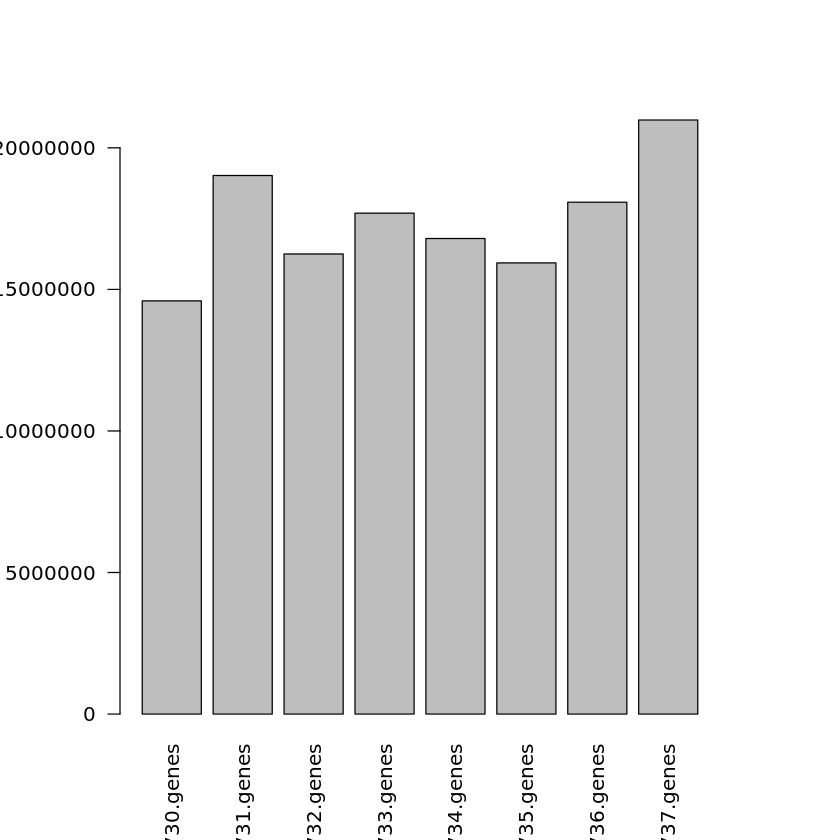

In [7]:
#Plot library size for each sample
par(mar=c(5,5,5,5))
options(scipen=5)
barplot(x$samples$lib.size, horiz=F, names.arg=colnames(x$counts), las=2)

In [8]:
samplenames <- substring(colnames(x), 1, nchar(colnames(x)))
samplenames

[1] "SRR2140730.genes" "SRR2140731.genes" "SRR2140732.genes" "SRR2140733.genes"
[5] "SRR2140734.genes" "SRR2140735.genes" "SRR2140736.genes" "SRR2140737.genes"

In [9]:
colnames(x) <- samplenames

group <- as.factor(c("Non_meta_Control",
                     "Non_meta_Control", 
                     "Non_meta_Nkx2",
                     "Non_meta_Nkx2",
                     "Non_meta_Nkx2_Foxa2_Cdx2",
                     "Non_meta_Nkx2_Foxa2_Cdx2",
                     "Meta",
                     "Meta"))
x$samples$group <- group
x$samples

,files,group,lib.size,norm.factors
SRR2140730.genes,SRR2140730.genes.results,Non_meta_Control,14593973,1
SRR2140731.genes,SRR2140731.genes.results,Non_meta_Control,19023916,1
SRR2140732.genes,SRR2140732.genes.results,Non_meta_Nkx2,16252167,1
SRR2140733.genes,SRR2140733.genes.results,Non_meta_Nkx2,17692110,1
SRR2140734.genes,SRR2140734.genes.results,Non_meta_Nkx2_Foxa2_Cdx2,16798322,1
SRR2140735.genes,SRR2140735.genes.results,Non_meta_Nkx2_Foxa2_Cdx2,15936720,1
SRR2140736.genes,SRR2140736.genes.results,Meta,18079920,1
SRR2140737.genes,SRR2140737.genes.results,Meta,20983744,1


# 4.3 Organising gene annotations


In [10]:
geneid <- rownames(x)
dim(x)
genes <- select(Mus.musculus, keys=geneid, columns=c("SYMBOL", "TXCHROM", "ENTREZID", "ENSEMBL"), 
                keytype="ENSEMBL")

head(genes, n=20)

[1] 36793     8

'select()' returned 1:many mapping between keys and columns


ENSEMBL,ENTREZID,SYMBOL,TXCHROM
ENSMUSG00000000001,14679,Gnai3,chr3
ENSMUSG00000000003,54192,Pbsn,chrX
ENSMUSG00000000028,12544,Cdc45,chr16
ENSMUSG00000000031,14955,H19,chr7
ENSMUSG00000000037,107815,Scml2,chrX
ENSMUSG00000000049,11818,Apoh,chr11
ENSMUSG00000000056,67608,Narf,chr11
ENSMUSG00000000058,12390,Cav2,chr6
ENSMUSG00000000078,23849,Klf6,chr13
ENSMUSG00000000085,29871,Scmh1,chr4


In [11]:
dim(genes)

[1] 37006     4

### Remove the duplicates

In [12]:
genes <- genes[!duplicated(genes$ENSEMBL),]
x$genes <- genes
x

An object of class "DGEList"
$samples
                                    files                    group lib.size
SRR2140730.genes SRR2140730.genes.results         Non_meta_Control 14593973
SRR2140731.genes SRR2140731.genes.results         Non_meta_Control 19023916
SRR2140732.genes SRR2140732.genes.results            Non_meta_Nkx2 16252167
SRR2140733.genes SRR2140733.genes.results            Non_meta_Nkx2 17692110
SRR2140734.genes SRR2140734.genes.results Non_meta_Nkx2_Foxa2_Cdx2 16798322
SRR2140735.genes SRR2140735.genes.results Non_meta_Nkx2_Foxa2_Cdx2 15936720
SRR2140736.genes SRR2140736.genes.results                     Meta 18079920
SRR2140737.genes SRR2140737.genes.results                     Meta 20983744
                 norm.factors
SRR2140730.genes            1
SRR2140731.genes            1
SRR2140732.genes            1
SRR2140733.genes            1
SRR2140734.genes            1
SRR2140735.genes            1
SRR2140736.genes            1
SRR2140737.genes            1

$counts
                    Samples
Tags                 SRR2140730.genes SRR2140731.genes SRR2140732.genes
  ENSMUSG00000000001             2642             3456             3780
  ENSMUSG00000000003                0                0                0
  ENSMUSG00000000028              349              453              382
  ENSMUSG00000000031                0                0                0
  ENSMUSG00000000037                0                0                1
                    Samples
Tags                 SRR2140733.genes SRR2140734.genes SRR2140735.genes
  ENSMUSG00000000001             4043             4238             3858
  ENSMUSG00000000003                0                0                0
  ENSMUSG00000000028              277              559              474
  ENSMUSG00000000031                0                0                0
  ENSMUSG00000000037                0                2                6
                    Samples
Tags                 SRR2140736.genes SRR2140737.genes
  ENSMUSG00000000001             4167             4689
  ENSMUSG00000000003                0                0
  ENSMUSG00000000028              817             1288
  ENSMUSG00000000031               11                3
  ENSMUSG00000000037                2               10
36788 more rows ...

$genes
             ENSEMBL ENTREZID SYMBOL TXCHROM
1 ENSMUSG00000000001    14679  Gnai3    chr3
2 ENSMUSG00000000003    54192   Pbsn    chrX
3 ENSMUSG00000000028    12544  Cdc45   chr16
4 ENSMUSG00000000031    14955    H19    chr7
5 ENSMUSG00000000037   107815  Scml2    chrX
36788 more rows ...

In [13]:
dim(x$genes)
dim(x$counts)

[1] 36793     4

[1] 36793     8

### Use the annotation file to remove non-coding RNAs

In [14]:
load("../Mus_musculusGRCm3868_ANNOT.Rdata")
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript",
                                              "sense_overlapping", "sense_intronic"))

# Make list of IDs to query
protein_coding_ids <- gsub("[.].*$","", ANNOT_protein_coding$gene_id)
ncRNA_ids <- gsub("[.].*$","", ANNOT_ncRNA$gene_id)

In [15]:
# A list of genes in ncRNA-ids
i <- x$genes$ENSEMBL %in% ncRNA_ids

# Which genes are in in ncRNA-ids
j <- which(x$genes$ENSEMBL %in% ncRNA_ids)

dim(x$genes)

x <- x[!i, , ]

dim(x$genes)

length(j)

[1] 36793     4

[1] 33676     4

[1] 3117

In [16]:
dim(x$genes)
dim(x$counts)

[1] 33676     4

[1] 33676     8

# 5 Data pre-processing
## 5.1 Transformations from the raw-scale

In [17]:
cpm <- cpm(x)
lcpm <- cpm(x, log=TRUE)

## 5.2 Removing genes that are lowly expressed

In [18]:
#edit this based on the number of samples
table(rowSums(x$counts==0)==8)


FALSE  TRUE 
21187 12489 

In [19]:
#edit this based on the number of samples
keep.exprs <- rowSums(cpm>1)>=3
x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)

[1] 12153     8

### Plot

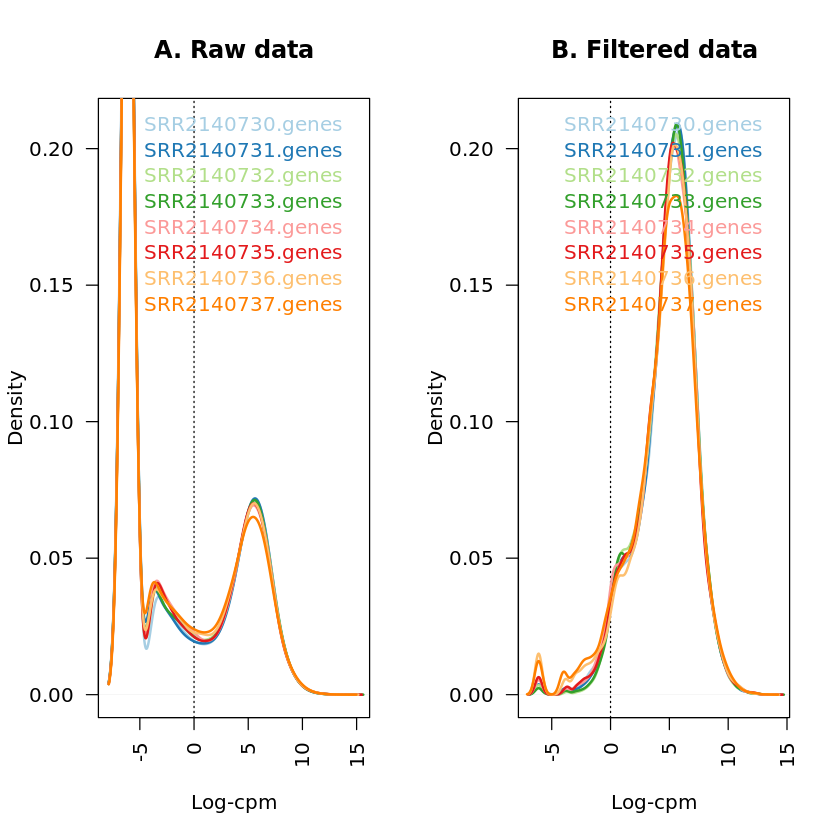

In [20]:
nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")
par(mfrow=c(1,2))
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(lcpm[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(lcpm[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

## 5.3 Normalising gene expression distributions

In [21]:
x <- calcNormFactors(x, method = "TMM")
x$samples$norm.factors

[1] 1.0361174 1.0285674 1.0151271 1.0083536 0.9930130 0.9866980 0.9992372
[8] 0.9363048

In [22]:
x2 <- x
x2$samples$norm.factors <- 1
x2$counts[,1] <- ceiling(x2$counts[,1]*0.05)
x2$counts[,2] <- x2$counts[,2]*5

### Plot

[1] 0.06330837 6.03368593 1.20195083 1.19392103 1.18025662 1.16607930 1.18877672
[8] 1.11503644

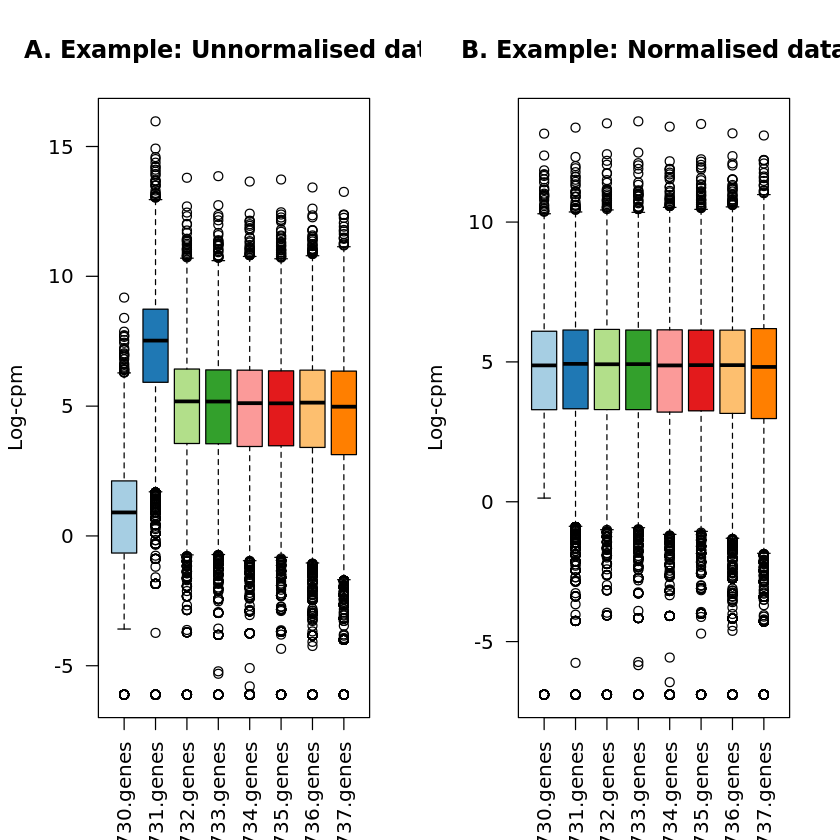

In [23]:
par(mfrow=c(1,2))
lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="A. Example: Unnormalised data",ylab="Log-cpm")
x2 <- calcNormFactors(x2)  
x2$samples$norm.factors

lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="B. Example: Normalised data",ylab="Log-cpm")

## 5.4 Unsupervised clustering of samples


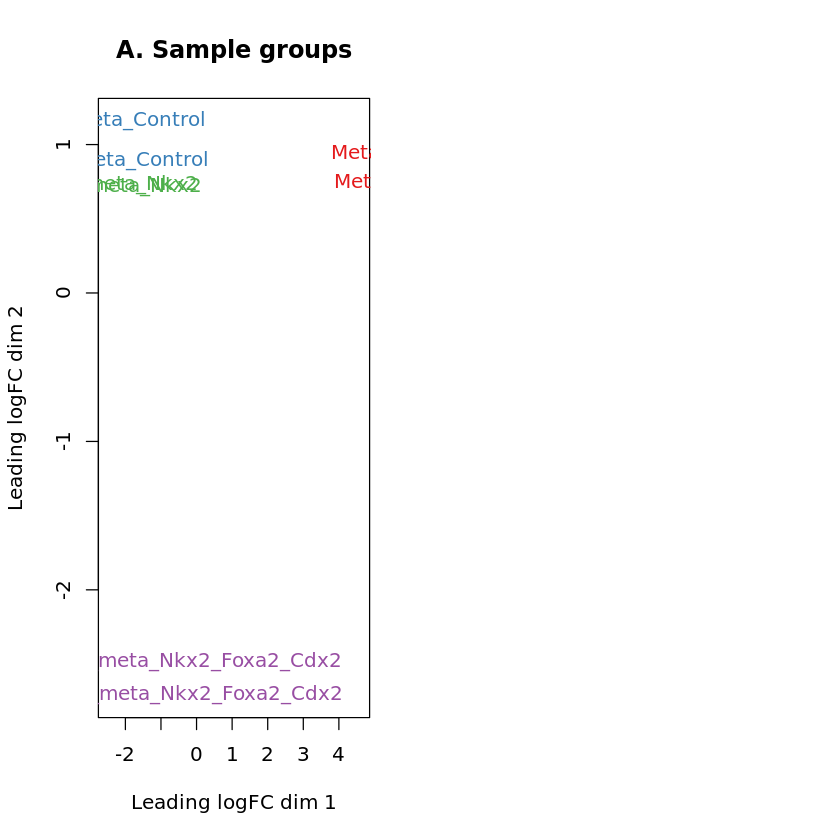

In [24]:
lcpm <- cpm(x, log=TRUE)
par(mfrow=c(1,2))
col.group <- group
levels(col.group) <-  brewer.pal(nlevels(col.group), "Set1")
col.group <- as.character(col.group)
plotMDS(lcpm, labels=group, col=col.group)
title(main="A. Sample groups")


# 6 Differential expression analysis
## 6.1 Creating a design matrix and contrasts

In [25]:
design <- model.matrix(~0+group)
colnames(design) <- gsub("group", "", colnames(design))
design

,Meta,Non_meta_Control,Non_meta_Nkx2,Non_meta_Nkx2_Foxa2_Cdx2
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,0,1
6,0,0,0,1
7,1,0,0,0
8,1,0,0,0


In [26]:
contr.matrix <- makeContrasts(
    Nkx2 = Non_meta_Nkx2 - Non_meta_Control,
    Nkx2_Foxa2_Cdx2 = Non_meta_Nkx2_Foxa2_Cdx2 - Non_meta_Control,
    Non_meta_vs_Meta = Non_meta_Control - Meta,
    Nkx2_Foxa2_Cdx2_vs_Meta = Non_meta_Nkx2_Foxa2_Cdx2 - Meta, 
    levels = colnames(design))
contr.matrix

,Nkx2,Nkx2_Foxa2_Cdx2,Non_meta_vs_Meta,Nkx2_Foxa2_Cdx2_vs_Meta
Meta,0,0,-1,-1
Non_meta_Control,-1,-1,1,0
Non_meta_Nkx2,1,0,0,0
Non_meta_Nkx2_Foxa2_Cdx2,0,1,0,1


## 6.2 Removing heteroscedascity from count data

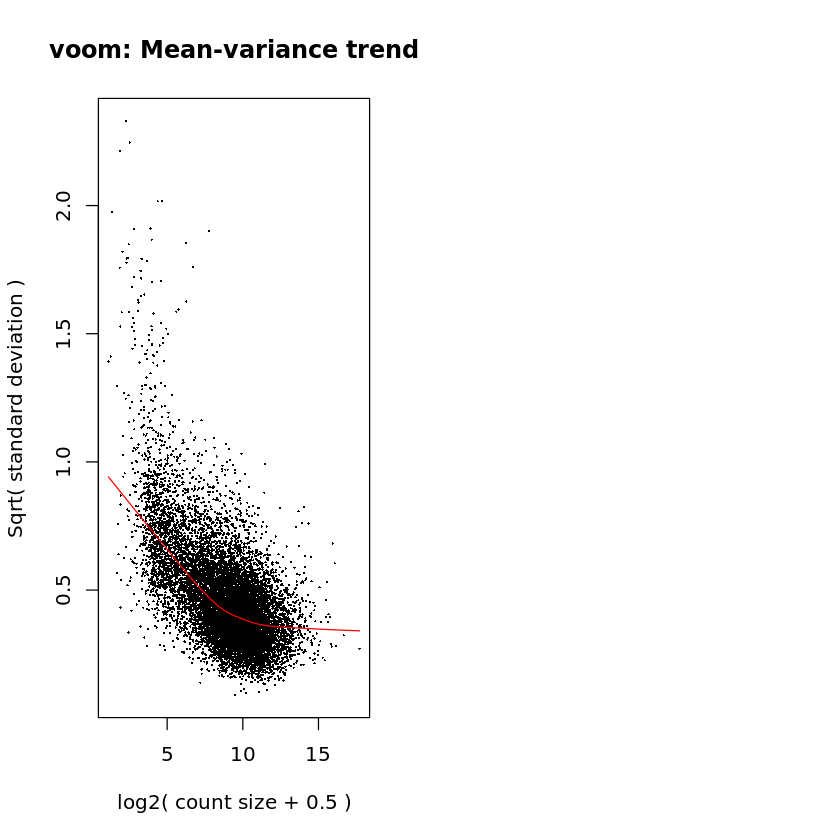

In [27]:
par(mfrow=c(1,2))
v <- voom(x, design, plot=TRUE)

In [28]:
v

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM
1,ENSMUSG00000000001,14679,Gnai3,chr3
3,ENSMUSG00000000028,12544,Cdc45,chr16
7,ENSMUSG00000000056,67608,Narf,chr11
8,ENSMUSG00000000058,12390,Cav2,chr6
9,ENSMUSG00000000078,23849,Klf6,chr13
10,ENSMUSG00000000085,29871,Scmh1,chr4
11,ENSMUSG00000000088,12858,Cox5a,chr9
16,ENSMUSG00000000126,216795,Wnt9a,chr11
17,ENSMUSG00000000127,14158,Fer,chr17
18,ENSMUSG00000000131,74204,Xpo6,chr7


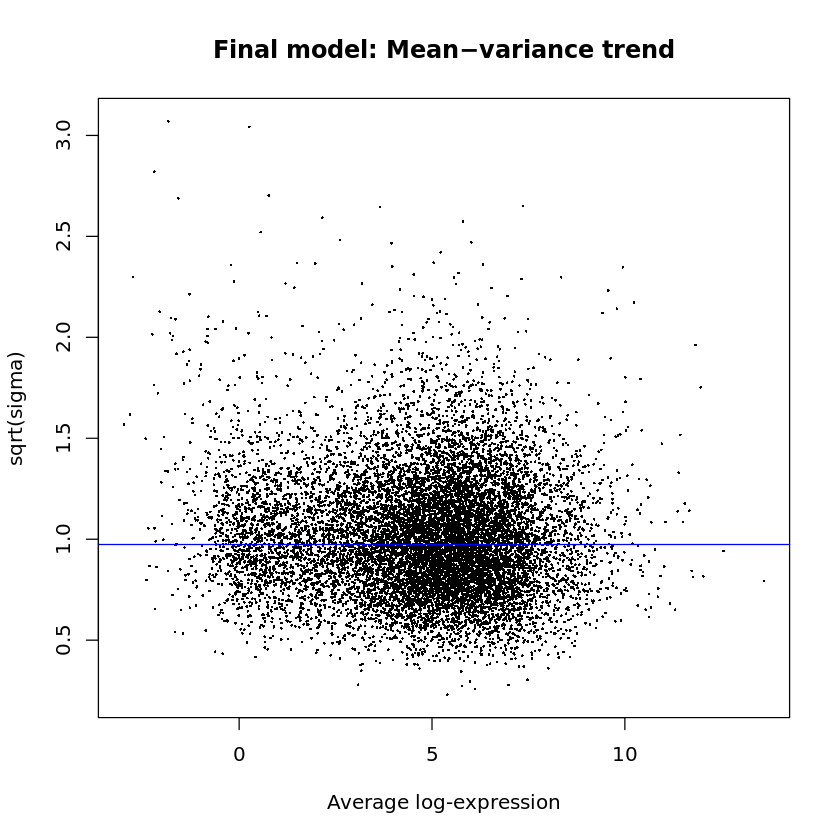

In [29]:
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model: Mean−variance trend")

In [40]:
# http://web.mit.edu/~r/current/arch/i386_linux26/lib/R/library/limma/html/marraylm.html
class(efit)
show(efit)

[1] "MArrayLM"
attr(,"package")
[1] "limma"

An object of class "MArrayLM"
$coefficients
                    Contrasts
                           Nkx2 Nkx2_Foxa2_Cdx2 Non_meta_vs_Meta
  ENSMUSG00000000001  0.3755224       0.5069445       -0.4246852
  ENSMUSG00000000028 -0.2923388       0.4598126       -1.2460434
  ENSMUSG00000000056  0.3657821       0.2627521        0.6608430
  ENSMUSG00000000058  0.6389655       1.0930974       -0.1675742
  ENSMUSG00000000078 -0.0502155       0.3584885        0.2538743
                    Contrasts
                     Nkx2_Foxa2_Cdx2_vs_Meta
  ENSMUSG00000000001              0.08225933
  ENSMUSG00000000028             -0.78623078
  ENSMUSG00000000056              0.92359511
  ENSMUSG00000000058              0.92552316
  ENSMUSG00000000078              0.61236284
12148 more rows ...

$stdev.unscaled
                    Contrasts
                          Nkx2 Nkx2_Foxa2_Cdx2 Non_meta_vs_Meta
  ENSMUSG00000000001 0.1297865       0.1296958        0.1294819
  ENSMUSG00000000028 0.1874877       0.17

## 6.4 Examining the number of DE genes


In [41]:
dt <- decideTests(efit)
summary(dt)

        Nkx2 Nkx2_Foxa2_Cdx2 Non_meta_vs_Meta Nkx2_Foxa2_Cdx2_vs_Meta
Down     144            1552             3395                    2721
NotSig 11770            9172             5247                    6520
Up       239            1429             3511                    2912

In [43]:
# stricter test not necessary

# tfit <- treat(vfit, lfc=1)
# dt <- decideTests(tfit)
# summary(dt)

In [44]:
de.common <- which(dt[,1]!=0 & dt[,2]!=0)
length(de.common)

head(efit$genes$SYMBOL[de.common], n=20)
head(efit$genes$ENSEMBL[de.common], n=20)

[1] 274

[1] "Cav2"     "Igsf5"    "Fmr1"     "Kctd10"   "Col6a1"   "Nkx2-1"  
 [7] "Ell2"     "Rab34"    "Slc39a13" "Apoc2"    "Klf4"     "Cp"      
[13] "Nfat5"    "Map3k20"  "Clcn5"    "Wisp1"    "Htra1"    "Fblim1"  
[19] "Tmbim1"   "Cdc42"

[1] "ENSMUSG00000000058" "ENSMUSG00000000159" "ENSMUSG00000000838"
 [4] "ENSMUSG00000001098" "ENSMUSG00000001119" "ENSMUSG00000001496"
 [7] "ENSMUSG00000001542" "ENSMUSG00000002059" "ENSMUSG00000002105"
[10] "ENSMUSG00000002992" "ENSMUSG00000003032" "ENSMUSG00000003617"
[13] "ENSMUSG00000003847" "ENSMUSG00000004085" "ENSMUSG00000004317"
[16] "ENSMUSG00000005124" "ENSMUSG00000006205" "ENSMUSG00000006219"
[19] "ENSMUSG00000006301" "ENSMUSG00000006699"

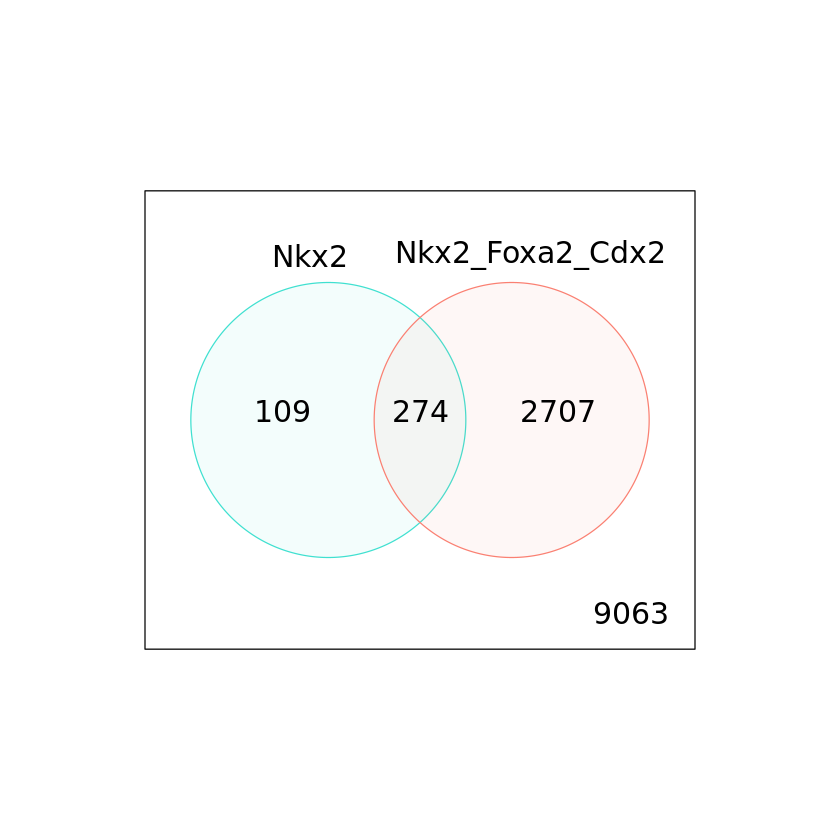

In [45]:
vennDiagram(dt[,1:2], circle.col=c("turquoise", "salmon"))

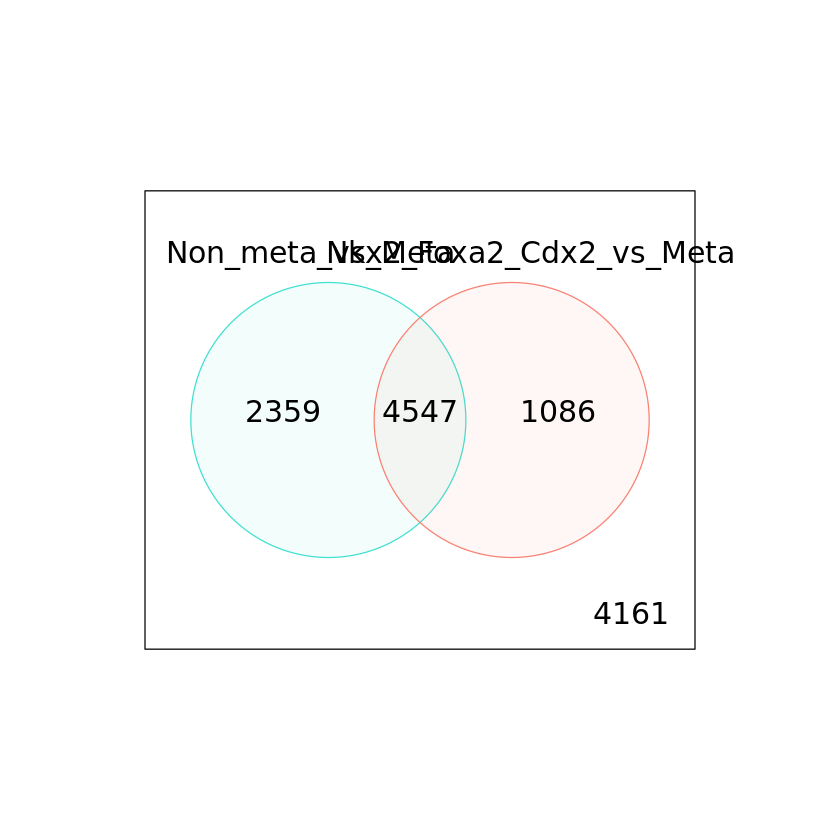

In [46]:
vennDiagram(dt[,3:4], circle.col=c("turquoise", "salmon"))

In [76]:
# https://www.rdocumentation.org/packages/limma/versions/3.28.14/topics/write.fit
write.fit(efit, dt, file="results.csv", sep=",")

## 6.5 Examining individual DE genes from top to bottom

In [48]:
Nkx2 <- topTreat(efit, coef="Nkx2", n=Inf)
head(Nkx2, n = 5)

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000029322,ENSMUSG00000029322,231507,Plac8,chr5,-2.314520,2.458727,-16.50169,0.0000002971539,0.003611311,7.195062
ENSMUSG00000043501,ENSMUSG00000043501,107753,Lgals2,chr15,1.720306,2.993873,13.72392,0.0000011668786,0.004695465,6.252440
ENSMUSG00000024501,ENSMUSG00000024501,22240,Dpysl3,chr18,1.639922,7.486525,13.06273,0.0000016786924,0.004695465,5.917150
ENSMUSG00000006777,ENSMUSG00000006777,94179,Krt23,chr11,-1.856322,3.943490,-12.43163,0.0000024141808,0.004695465,5.544913
ENSMUSG00000062270,ENSMUSG00000062270,21761,Morf4l1,chr9,1.233389,7.769594,12.21093,0.0000027522806,0.004695465,5.421969


In [110]:
Nkx2_Foxa2_Cdx2 <- topTreat(efit, coef="Nkx2_Foxa2_Cdx2", n=Inf)
head(Nkx2_Foxa2_Cdx2, n = 5)

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000053964,ENSMUSG00000053964,16855,Lgals4,chr7,-4.368206,6.938762,-42.39735,2.368485e-10,0.00000287842,14.00735
ENSMUSG00000024388,ENSMUSG00000024388,17922,Myo7b,chr18,-4.575562,4.668485,-31.69877,2.163561e-09,0.00001314688,11.45492
ENSMUSG00000026090,ENSMUSG00000026090,72097,2010300C02Rik,chr1,-4.560823,5.111108,-27.23281,6.846043e-09,0.00002773332,10.58692
ENSMUSG00000036782,ENSMUSG00000036782,67455,Klhl13,chrX,-3.272671,5.676191,-26.18623,9.211551e-09,0.00002795788,10.95926
ENSMUSG00000031996,ENSMUSG00000031996,11804,Aplp2,chr9,-2.640285,8.656703,-24.81622,1.383276e-08,0.00002795788,10.66393


In [50]:
Non_meta_vs_Meta <- topTreat(efit, coef="Non_meta_vs_Meta", n=Inf)
head(Non_meta_vs_Meta, n = 5)

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000053964,ENSMUSG00000053964,16855,Lgals4,chr7,9.056209,6.938762,41.88165,2.599874e-10,0.000002904797,12.57475
ENSMUSG00000086503,ENSMUSG00000086503,213742,Xist,chrX,8.229814,8.330981,38.57518,4.862746e-10,0.000002904797,12.88385
ENSMUSG00000031375,ENSMUSG00000031375,12111,Bgn,chrX,-7.891591,5.483821,-36.08863,8.073361e-10,0.000002904797,13.02153
ENSMUSG00000002297,ENSMUSG00000002297,27214,Dbf4,chr5,-5.208528,7.137785,-35.29507,9.560755e-10,0.000002904797,13.26973
ENSMUSG00000052727,ENSMUSG00000052727,17755,Map1b,chr13,-5.581885,5.283739,-32.85748,1.647147e-09,0.000003621014,12.56408


In [51]:
Nkx2_Foxa2_Cdx2_vs_Meta <- topTreat(efit, coef="Nkx2_Foxa2_Cdx2_vs_Meta", n=Inf)
head(Nkx2_Foxa2_Cdx2_vs_Meta, n = 5)

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000086503,ENSMUSG00000086503,213742,Xist,chrX,8.234573,8.330981,38.59005,4.848506e-10,0.000003810682,12.84990
ENSMUSG00000031375,ENSMUSG00000031375,12111,Bgn,chrX,-7.007494,5.483821,-37.30710,6.271179e-10,0.000003810682,13.44244
ENSMUSG00000002297,ENSMUSG00000002297,27214,Dbf4,chr5,-4.631345,7.137785,-32.50955,1.785897e-09,0.000006149112,12.69838
ENSMUSG00000052727,ENSMUSG00000052727,17755,Map1b,chr13,-4.904470,5.283739,-31.97851,2.023899e-09,0.000006149112,12.47402
ENSMUSG00000000303,ENSMUSG00000000303,12550,Cdh1,chr8,7.809348,7.656097,30.72903,2.739176e-09,0.000006657842,11.43039


## Output the results for downstream network analysis

In [127]:
dt

,Nkx2,Nkx2_Foxa2_Cdx2,Non_meta_vs_Meta,Nkx2_Foxa2_Cdx2_vs_Meta
ENSMUSG00000000001,0,1,-1,0
ENSMUSG00000000028,0,0,-1,-1
ENSMUSG00000000056,0,0,0,1
ENSMUSG00000000058,1,1,0,1
ENSMUSG00000000078,0,0,0,1
ENSMUSG00000000085,0,0,-1,-1
ENSMUSG00000000088,0,0,1,1
ENSMUSG00000000126,0,1,-1,0
ENSMUSG00000000127,0,1,-1,0
ENSMUSG00000000131,0,0,0,0


In [128]:
# Compare the comparisons between Nkx2-Control and Nkx2_Foxa2_Cdx2-Control

are_df <- rowSums(abs(dt[ , c('Nkx2', 'Nkx2_Foxa2_Cdx2')])) == 1  # DF genes in both sets
is_up_or_down_reg <- abs(dt[, c('Nkx2')]) == 1  # Genes that are up or down-regulated in Nkx2 compared to control
DF_table <- dt[are_df & is_up_or_down_reg , ]
DF_table

,Nkx2,Nkx2_Foxa2_Cdx2,Non_meta_vs_Meta,Nkx2_Foxa2_Cdx2_vs_Meta
ENSMUSG00000000184,1,0,1,1
ENSMUSG00000000253,-1,0,1,1
ENSMUSG00000001120,1,0,1,1
ENSMUSG00000001761,1,0,-1,0
ENSMUSG00000002307,1,0,-1,-1
ENSMUSG00000002799,1,0,1,1
ENSMUSG00000002831,1,0,1,1
ENSMUSG00000003352,1,0,-1,-1
ENSMUSG00000004530,-1,0,-1,-1
ENSMUSG00000005958,1,0,1,1


In [129]:
DF_table2 <- Nkx2[rownames(DF_table), ]
dim(DF_table2)
DF_table2

[1] 109  10

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000000184,ENSMUSG00000000184,12444,Ccnd2,chr6,1.0360041,7.6453650,6.043150,0.000368554492,0.024080875,0.2436745
ENSMUSG00000000253,ENSMUSG00000000253,66355,Gmpr,chr13,-1.4524182,2.6767417,-5.924810,0.000418579177,0.026221612,0.5343468
ENSMUSG00000001120,ENSMUSG00000001120,59093,Pcbp3,chr10,2.1014078,3.2311375,8.308081,0.000043294726,0.010737976,2.7190825
ENSMUSG00000001761,ENSMUSG00000001761,319757,Smo,chr6,0.7096166,7.2751669,5.126845,0.001035245682,0.040073761,-0.8240278
ENSMUSG00000002307,ENSMUSG00000002307,13163,Daxx,chr17,0.6895481,5.1430389,6.089928,0.000350637897,0.023787757,0.4960856
ENSMUSG00000002799,ENSMUSG00000002799,16450,Jag2,chr12,1.5690943,1.5774237,5.070206,0.001107594548,0.040784535,-0.3846426
ENSMUSG00000002831,ENSMUSG00000002831,57435,Plin4,chr17,1.7517134,5.5164717,9.428926,0.000017775345,0.008050026,3.5138610
ENSMUSG00000003352,ENSMUSG00000003352,12297,Cacnb3,chr15,0.9237848,6.9299685,5.652477,0.000564798432,0.030237865,-0.1563326
ENSMUSG00000004530,ENSMUSG00000004530,23790,Coro1c,chr5,-0.6232742,7.2605271,-4.884172,0.001387167770,0.046698753,-1.1193934
ENSMUSG00000005958,ENSMUSG00000005958,13845,Ephb3,chr16,0.7757471,4.4662511,6.133342,0.000334869479,0.023482590,0.5646962


In [130]:
DF_table3 <- DF_table2[DF_table2$adj.P.Val < 0.05 , ]
dim(DF_table3)
head(DF_table3)

[1] 109  10

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000000184,ENSMUSG00000000184,12444,Ccnd2,chr6,1.0360041,7.645365,6.043150,0.00036855449,0.02408087,0.2436745
ENSMUSG00000000253,ENSMUSG00000000253,66355,Gmpr,chr13,-1.4524182,2.676742,-5.924810,0.00041857918,0.02622161,0.5343468
ENSMUSG00000001120,ENSMUSG00000001120,59093,Pcbp3,chr10,2.1014078,3.231137,8.308081,0.00004329473,0.01073798,2.7190825
ENSMUSG00000001761,ENSMUSG00000001761,319757,Smo,chr6,0.7096166,7.275167,5.126845,0.00103524568,0.04007376,-0.8240278
ENSMUSG00000002307,ENSMUSG00000002307,13163,Daxx,chr17,0.6895481,5.143039,6.089928,0.00035063790,0.02378776,0.4960856
ENSMUSG00000002799,ENSMUSG00000002799,16450,Jag2,chr12,1.5690943,1.577424,5.070206,0.00110759455,0.04078454,-0.3846426


In [131]:
# https://www.rdocumentation.org/packages/utils/versions/3.5.1/topics/write.table
write.table(DF_table3, "Nkx2_vs_Nkx2_Foxa2_Cdx2_top.csv",
               sep=",", row.names=TRUE, col.names=TRUE)

In [132]:
# https://www.rdocumentation.org/packages/utils/versions/3.5.1/topics/read.table
read.delim("Nkx2_vs_Nkx2_Foxa2_Cdx2_top.csv", sep=",")

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000000184,ENSMUSG00000000184,12444,Ccnd2,chr6,1.0360041,7.6453650,6.043150,0.000368554492,0.024080875,0.2436745
ENSMUSG00000000253,ENSMUSG00000000253,66355,Gmpr,chr13,-1.4524182,2.6767417,-5.924810,0.000418579177,0.026221612,0.5343468
ENSMUSG00000001120,ENSMUSG00000001120,59093,Pcbp3,chr10,2.1014078,3.2311375,8.308081,0.000043294726,0.010737976,2.7190825
ENSMUSG00000001761,ENSMUSG00000001761,319757,Smo,chr6,0.7096166,7.2751669,5.126845,0.001035245682,0.040073761,-0.8240278
ENSMUSG00000002307,ENSMUSG00000002307,13163,Daxx,chr17,0.6895481,5.1430389,6.089928,0.000350637897,0.023787757,0.4960856
ENSMUSG00000002799,ENSMUSG00000002799,16450,Jag2,chr12,1.5690943,1.5774237,5.070206,0.001107594548,0.040784535,-0.3846426
ENSMUSG00000002831,ENSMUSG00000002831,57435,Plin4,chr17,1.7517134,5.5164717,9.428926,0.000017775345,0.008050026,3.5138610
ENSMUSG00000003352,ENSMUSG00000003352,12297,Cacnb3,chr15,0.9237848,6.9299685,5.652477,0.000564798432,0.030237865,-0.1563326
ENSMUSG00000004530,ENSMUSG00000004530,23790,Coro1c,chr5,-0.6232742,7.2605271,-4.884172,0.001387167770,0.046698753,-1.1193934
ENSMUSG00000005958,ENSMUSG00000005958,13845,Ephb3,chr16,0.7757471,4.4662511,6.133342,0.000334869479,0.023482590,0.5646962


## 6.6 Useful graphical representations of differential expression results

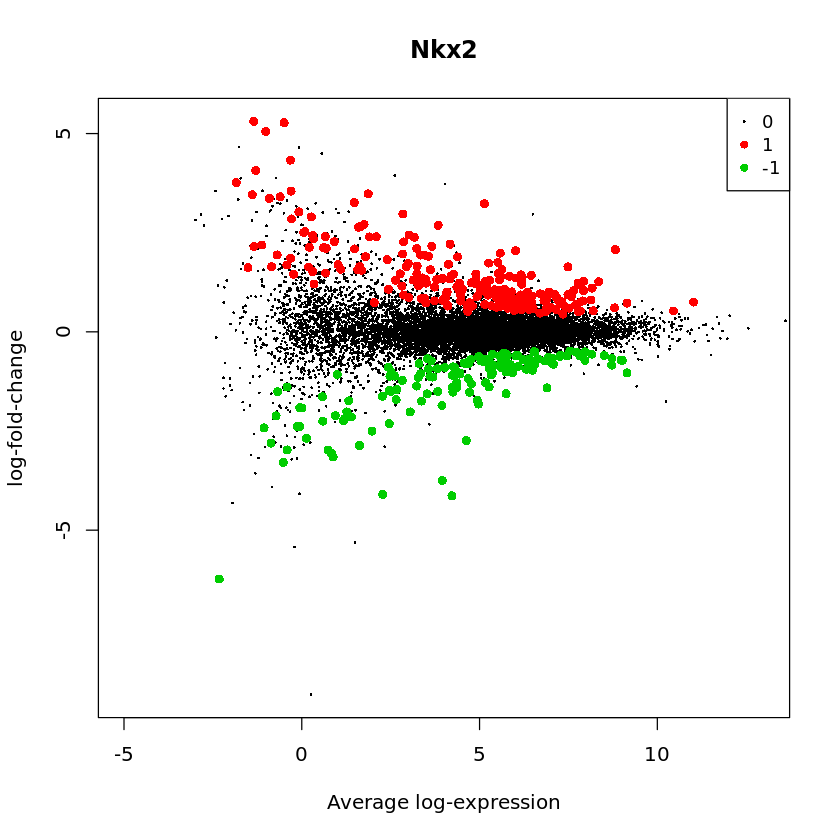

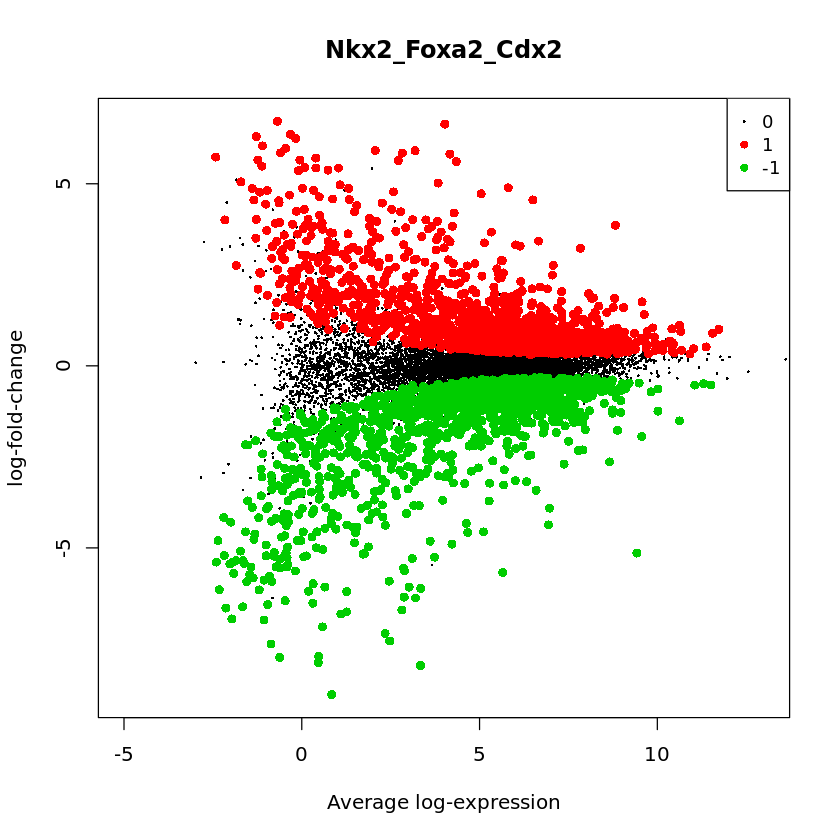

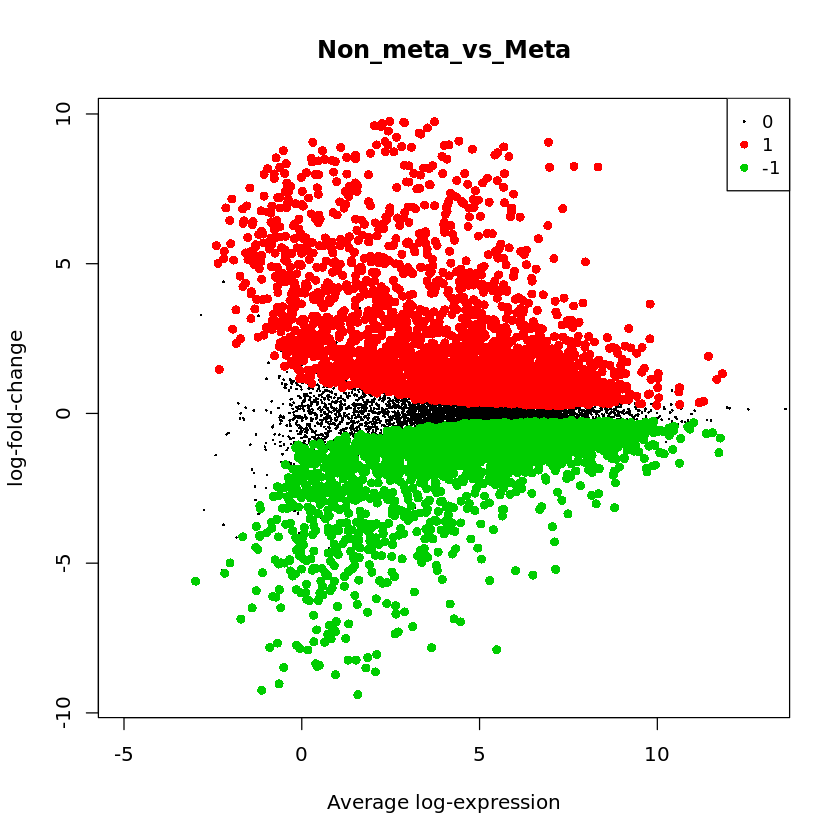

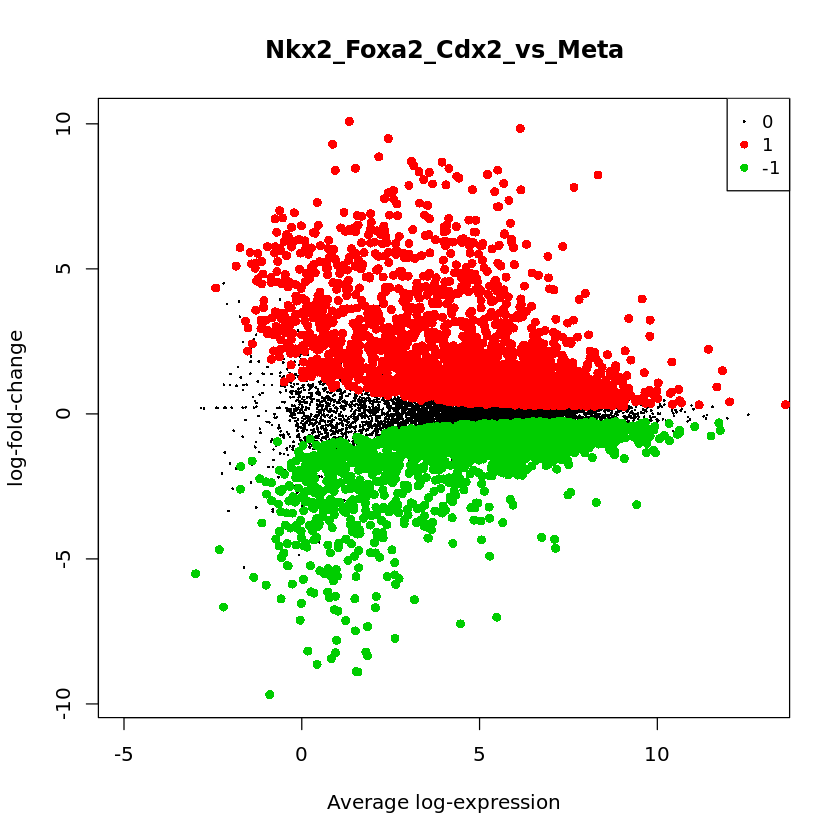

In [55]:
contrast_list <- colnames(contr.matrix)

for (i in contrast_list){
   plotMD(efit, column=i, status=dt[,i], values=c(1,-1), main=i,
      xlim=c(-5,13))
}

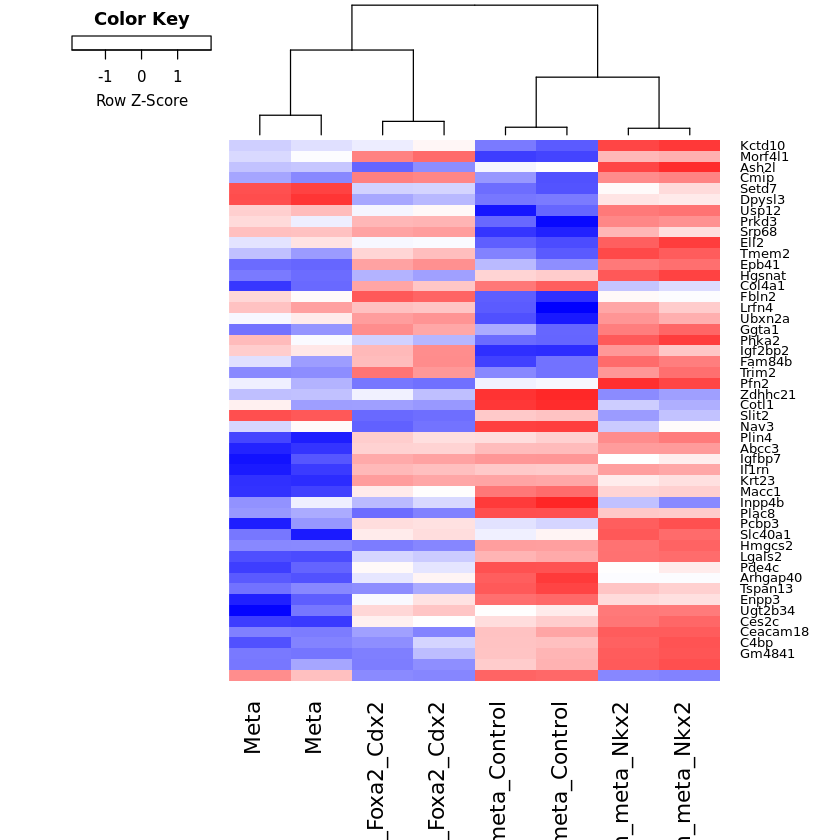

In [56]:
Nkx2.topgenes <- row.names(Nkx2)[1:50]
i <- which(row.names(v$E) %in% Nkx2.topgenes)

mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,], scale="row",
   labRow=v$genes$SYMBOL[i], labCol=group, 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

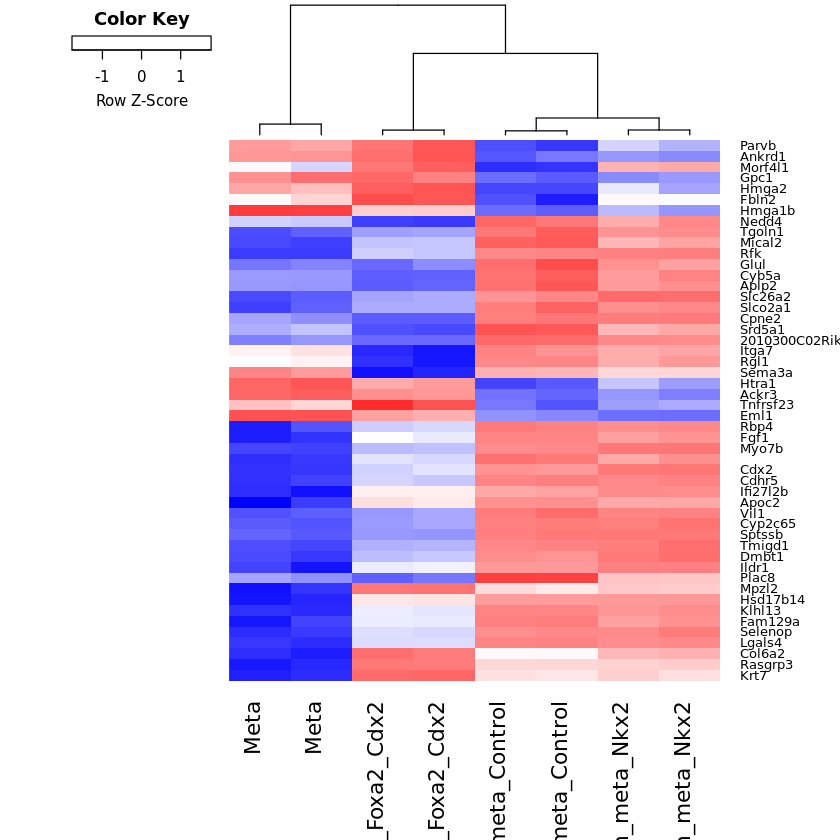

In [57]:
Nkx2_Foxa2_Cdx2.topgenes <- row.names(Nkx2_Foxa2_Cdx2)[1:50]
i <- which(row.names(v$E) %in% Nkx2_Foxa2_Cdx2.topgenes)

mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,], scale="row",
   labRow=v$genes$SYMBOL[i], labCol=group, 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

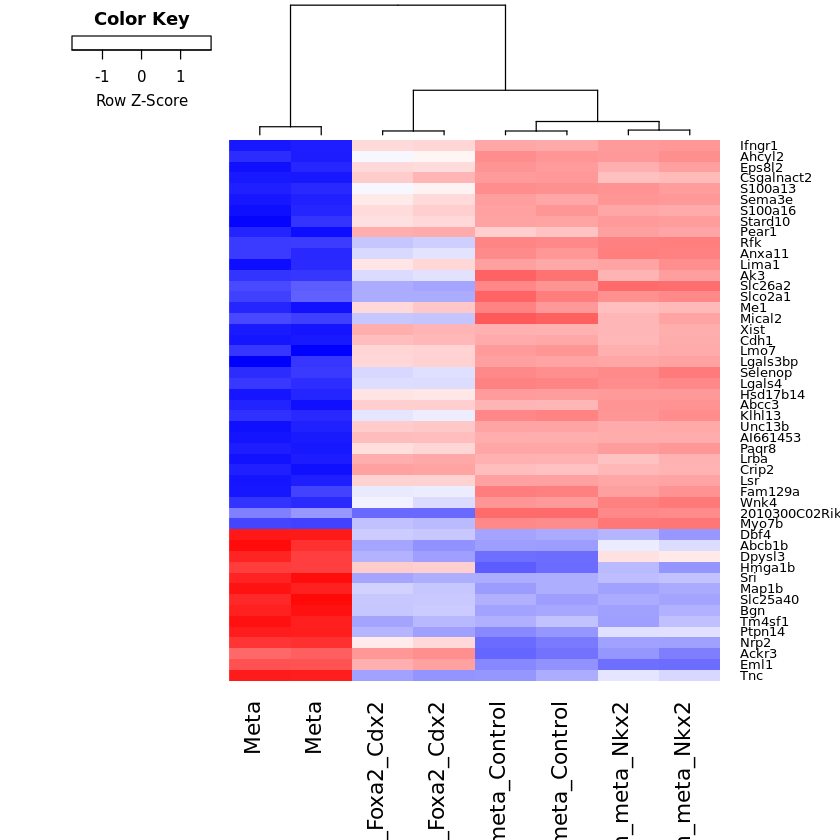

In [58]:
Non_meta_vs_Meta.topgenes <- row.names(Non_meta_vs_Meta)[1:50]
i <- which(row.names(v$E) %in% Non_meta_vs_Meta.topgenes)

mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,], scale="row",
   labRow=v$genes$SYMBOL[i], labCol=group, 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

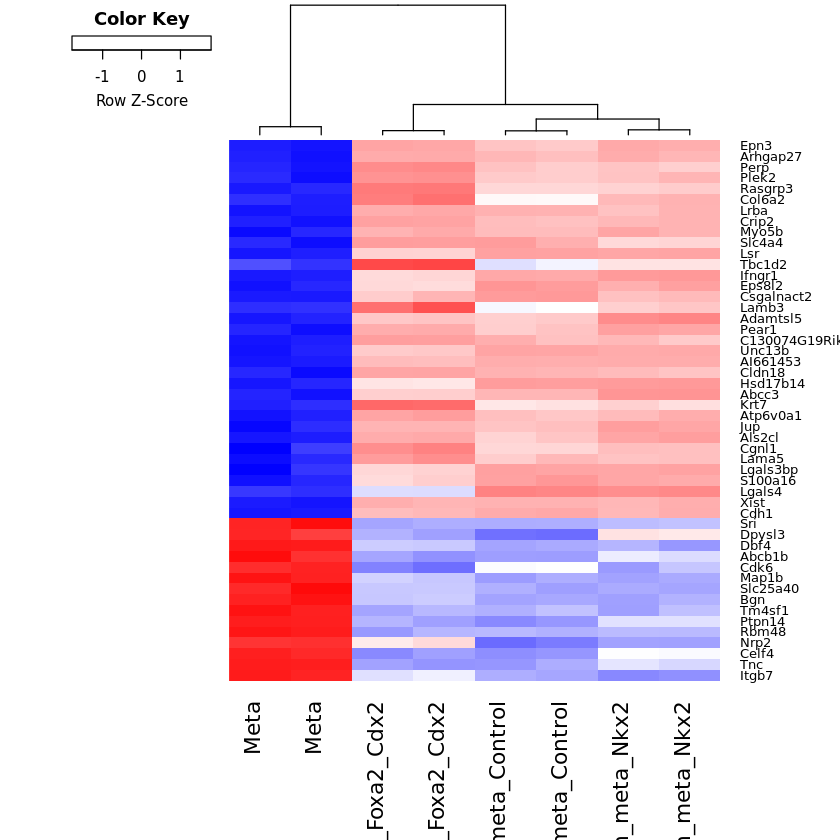

In [59]:
Nkx2_Foxa2_Cdx2_vs_Meta.topgenes <- row.names(Nkx2_Foxa2_Cdx2_vs_Meta)[1:50]
i <- which(row.names(v$E) %in% Nkx2_Foxa2_Cdx2_vs_Meta.topgenes)

mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,], scale="row",
   labRow=v$genes$SYMBOL[i], labCol=group, 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

# 7 Gene set testing with camera

In [60]:
# load(system.file("extdata", "mouse_c2_v5p1.rda", package = "RNAseq123"))
# idx <- ids2indices(Mm.c2,id=rownames(v))
# cam.BasalvsLP <- camera(v,idx,design,contrast=contr.matrix[,1])
# head(cam.BasalvsLP,5)

# Extra: WebGestaltR 

In [61]:
dim(Nkx2_Foxa2_Cdx2)
Nkx2_Foxa2_Cdx2

[1] 12153    10

,ENSEMBL,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSMUSG00000053964,ENSMUSG00000053964,16855,Lgals4,chr7,-4.368206,6.938762,-42.39735,2.368485e-10,0.00000287842,14.007349
ENSMUSG00000024388,ENSMUSG00000024388,17922,Myo7b,chr18,-4.575562,4.668485,-31.69877,2.163561e-09,0.00001314688,11.454924
ENSMUSG00000026090,ENSMUSG00000026090,72097,2010300C02Rik,chr1,-4.560823,5.111108,-27.23281,6.846043e-09,0.00002773332,10.586923
ENSMUSG00000036782,ENSMUSG00000036782,67455,Klhl13,chrX,-3.272671,5.676191,-26.18623,9.211551e-09,0.00002795788,10.959256
ENSMUSG00000031996,ENSMUSG00000031996,11804,Aplp2,chr9,-2.640285,8.656703,-24.81622,1.383276e-08,0.00002795788,10.663933
ENSMUSG00000025497,ENSMUSG00000025497,72040,Cdhr5,chr7,-5.254459,3.734825,-24.42456,1.560072e-08,0.00002795788,9.746921
ENSMUSG00000064373,ENSMUSG00000064373,20363,Selenop,chr15,-3.908994,6.969522,-24.04600,1.755565e-08,0.00002795788,10.413661
ENSMUSG00000023039,ENSMUSG00000023039,110310,Krt7,chr15,3.284952,6.141741,23.89629,1.840394e-08,0.00002795788,10.386676
ENSMUSG00000034320,ENSMUSG00000034320,13521,Slc26a2,chr18,-2.700190,7.376598,-22.93290,2.511142e-08,0.00003390879,10.074215
ENSMUSG00000034361,ENSMUSG00000034361,234577,Cpne2,chr8,-2.855018,5.694600,-22.19747,3.211200e-08,0.00003895014,9.723620


In [62]:
DE_genes_webg <- data.frame(row.names(Nkx2_Foxa2_Cdx2_vs_Meta)[Nkx2_Foxa2_Cdx2_vs_Meta$adj.P.Val < 0.05])
head(DE_genes_webg)

ALL_genes_webg <- data.frame(row.names(Nkx2_Foxa2_Cdx2_vs_Meta))

write.table(DE_genes_webg, "DE_InterestingGenes_Webgestalt_input.txt",
               sep="\t", row.names=F, col.names=F)

write.table(ALL_genes_webg, "DE_ReferenceGenes.txt", sep="\t",row.names=F, col.names=F)

row.names.Nkx2_Foxa2_Cdx2_vs_Meta..Nkx2_Foxa2_Cdx2_vs_Meta.adj.P.Val...
ENSMUSG00000086503
ENSMUSG00000031375
ENSMUSG00000002297
ENSMUSG00000052727
ENSMUSG00000000303
ENSMUSG00000003161


In [160]:
interestGeneFile <- c("DE_InterestingGenes_Webgestalt_input.txt")
referenceGeneFile <- c("DE_ReferenceGenes.txt")
org <- "mmusculus"
outputDirectory <- getwd()
#for (database in listGeneSet(org)){
for (database in c("geneontology_Biological_Process","geneontology_Molecular_Function",
                   "geneontology_Biological_Process_noRedundant", "pathway_KEGG","pathway_Panther","pathway_Reactome",
                   "pathway_Wikipathway","network_Kinase_target", "network_miRNA_target","network_PPI_BIOGRID",
                   "network_Transcription_Factor_target", "disease_Disgenet", "disease_OMIM", "drug_DrugBank", 
                   "phenotype_Human_Phenotype_Ontology"))
{
    enrichResult <- WebGestaltR(enrichMethod="ORA", organism=org,
                                minNum=1,
                                enrichDatabase=database,interestGeneFile=interestGeneFile,
                                interestGeneType="ensembl_gene_id",referenceGeneFile=referenceGeneFile,
                                referenceGeneType="ensembl_gene_id",is.output=TRUE,
                                outputDirectory=outputDirectory,
                                projectName=sprintf("comp_%s",  database))
}

Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Summary the uploaded gene list by GO Slim data...
Perform the enrichment analysis...
Generate the final report...
Results can be found in the /home/rstudio/cirrus-ngs-john/notebooks/GSE71629/Project_comp_geneontology_Biological_Process!Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Summary the uploaded gene list by GO Slim data...
Perform the enrichment analysis...
Generate the final report...
Results can be found in the /home/rstudio/cirrus-ngs-john/notebooks/GSE71629/Project_comp_geneontology_Molecular_Function!Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Summary the uploaded gene list by GO Slim data...
Perform the enrichment analysis...
Generate the final report...
Results can be found in the /home/rstudio/cirrus-ngs-john/notebooks/GSE71629/Project_comp_geneontology_Bi

#### Database
"geneontology_Biological_Process","geneontology_Molecular_Function","geneontology_Biological_Process_noRedundant",
                   "pathway_KEGG","pathway_Panther","pathway_Reactome","pathway_Wikipathway","network_Kinase_target",
                   "network_miRNA_target","network_PPI_BIOGRID","network_Transcription_Factor_target",
                   "disease_Disgenet", "disease_OMIM", "drug_DrugBank", "phenotype_Human_Phenotype_Ontology"

### Import Data from Results

In [63]:
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",
         "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant",
         "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant",
         "pathway_KEGG", "pathway_Panther",
         "pathway_Reactome", "pathway_Wikipathway",
         "network_miRNA_target", "network_PPI_BIOGRID",
         "network_Transcription_Factor_target")

dirs <- dir(pattern="^Project")

dirs.l <-  dirs[grep("^Project", dirs)]

webgest.results <- lapply(dirs.l, function(y) {
                       #lapply(classes, function(y) {
                       #unlist(lapply(dirs.l[[i]], function(x) {
   
           d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
           d <- dir(y, pattern="enrichment_results")
           names(d) <- gsub("enrichment_results_","",
                                  gsub(".txt","", d))
           
           if(length(d2) > 0) {
               dat <- read.csv(d2[1], header=TRUE, sep="\t")
               s <- sum(dat$FDR < 0.1)
               names(s) <- names(d)
               #message(names(s))
               return(s)
           }
           
})

webgest.results

[[1]]
comp_geneontology_Biological_Process 
                                1300 

[[2]]
comp_geneontology_Biological_Process_noRedundant 
                                              64 

[[3]]
comp_geneontology_Molecular_Function 
                                 214 

[[4]]
comp_network_miRNA_target 
                       26 

[[5]]
comp_network_PPI_BIOGRID 
                       1 

[[6]]
comp_network_Transcription_Factor_target 
                                     312 

[[7]]
comp_pathway_KEGG 
                1 

[[8]]
NULL

[[9]]
comp_pathway_Reactome 
                    4 

[[10]]
NULL

## Extra: Gene Set Enrichment Analysis with GSVA

In [184]:
counts <- x$counts
rownames(counts) <- x$genes$ENTREZID
head(counts)

,SRR2140730.genes,SRR2140731.genes,SRR2140732.genes,SRR2140733.genes,SRR2140734.genes,SRR2140735.genes,SRR2140736.genes,SRR2140737.genes
14679,2642,3456,3780,4043,4238,3858,4167,4689
12544,349,453,382,277,559,474,817,1288
67608,734,606,894,806,834,665,533,391
12390,1760,2473,3337,3154,4270,4123,2654,2465
23849,3622,3519,3820,3086,4268,4336,3257,3257
29871,198,270,219,197,285,196,515,484


In [195]:
#c2gsc2 <- getGmt("c2.all.v6.2.symbols.gmt", 
#                 collectionType=BroadCollection(category="c2"),
#geneIdType=SymbolIdentifier())

In [191]:
data(c2BroadSets)

c2 <- GeneSetCollection(c(c2BroadSets))
c2

GeneSetCollection
  names: NAKAMURA_CANCER_MICROENVIRONMENT_UP, NAKAMURA_CANCER_MICROENVIRONMENT_DN, ..., ST_PHOSPHOINOSITIDE_3_KINASE_PATHWAY (3272 total)
  unique identifiers: 5167, 100288400, ..., 57191 (29340 total)
  types in collection:
    geneIdType: EntrezIdentifier (1 total)
    collectionType: BroadCollection (1 total)

In [194]:
canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)),
                                      grep("^REACTOME", names(c2BroadSets)),
                                      grep("^BIOCARTA", names(c2BroadSets)))]

#c2 <- GeneSetCollection(c(canonicalC2BroadSets))
#c2

The GSVA package implements the methodology described in the previous section in the function gsva() which requires two main input arguments: the gene expression data and a collection of gene sets. The expression data can be provided either as a matrix object of genes (rows) by sample (columns) expression values, or as an ExpressionSet object. The collection of gene sets can be provided either as a list object with names identifying gene sets and each entry of the list containing the gene identifiers of the genes forming the corresponding set, or as a GeneSetCollection object as defined in the GSEABase package

In [192]:
es.max <- gsva(counts, c2, mx.diff=FALSE, verbose=FALSE, parallel.sz=1)
es.max
es.dif <- gsva(counts, c2, mx.diff=TRUE, verbose=FALSE, parallel.sz=1)
es.dif

,SRR2140730.genes,SRR2140731.genes,SRR2140732.genes,SRR2140733.genes,SRR2140734.genes,SRR2140735.genes,SRR2140736.genes,SRR2140737.genes
LANDIS_BREAST_CANCER_PROGRESSION_UP,0.3543447,0.2225363,0.2574477,0.2444199,0.2680660,0.4492225,-0.4228153,-0.5029509
LANDIS_BREAST_CANCER_PROGRESSION_DN,0.2667501,-0.2944339,0.2466368,0.1836691,-0.1871054,0.2997655,0.1814400,-0.2990357
GESERICK_TERT_TARGETS_DN,0.2700121,-0.7410713,-0.4023070,-0.5424173,0.5215364,0.6742736,0.3249270,-0.2330650
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_CDC25_UP,-0.1714262,-0.3849208,-0.2873543,-0.3457068,0.2977793,0.4608547,0.2847675,-0.2304939
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_CDC25_DN,0.2209918,-0.4748176,-0.2124219,0.1622076,-0.1938526,0.3732819,0.3432929,-0.2102865
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_UP,-0.2640878,-0.4045513,-0.3228589,-0.4290357,0.2488831,0.2690507,0.3361267,0.4243930
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_DN,0.3090383,0.1912667,0.3170542,0.3251649,0.2022779,0.3169347,-0.3315454,-0.4242059
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_CDC25_UP,-0.2162188,-0.3689174,-0.1778313,-0.1737872,0.1665231,0.2430808,0.2432222,0.2603747
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_CDC25_DN,0.2047455,-0.2242978,0.1887036,0.1688668,0.2962572,0.4120340,-0.2927853,-0.3394270
CASTELLANO_HRAS_TARGETS_UP,-0.7995720,-0.5540036,-0.3396806,0.2646308,0.4325463,0.2079455,0.6521330,0.4824281


,SRR2140730.genes,SRR2140731.genes,SRR2140732.genes,SRR2140733.genes,SRR2140734.genes,SRR2140735.genes,SRR2140736.genes,SRR2140737.genes
LANDIS_BREAST_CANCER_PROGRESSION_UP,0.264856002,0.04468200,0.164174225,0.16983167,0.161997688,0.399682835,-0.35627524,-0.48602691
LANDIS_BREAST_CANCER_PROGRESSION_DN,0.201549300,-0.20767093,0.148158003,0.07468879,-0.025076872,0.252042509,0.05301913,-0.21212759
GESERICK_TERT_TARGETS_DN,0.090438143,-0.73958810,-0.251676905,-0.46351102,0.454025336,0.671801643,0.28025662,-0.10326519
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_CDC25_UP,-0.091888717,-0.33417799,-0.231481539,-0.31428400,0.243317703,0.450936500,0.24085507,-0.16125872
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_CDC25_DN,0.025852642,-0.38696076,-0.068840726,0.04367960,-0.005860491,0.347262088,0.25264701,-0.13577387
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_UP,-0.242865341,-0.38891931,-0.301601754,-0.39426672,0.221180418,0.194761300,0.30696214,0.41442237
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_KRAS_DN,0.272245390,0.05787675,0.272877134,0.29473101,0.037017927,0.296220625,-0.28907024,-0.37272348
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_CDC25_UP,-0.169122166,-0.33959939,-0.075675490,-0.10749160,0.057857091,0.181519886,0.12945663,0.19811971
CHIARADONNA_NEOPLASTIC_TRANSFORMATION_CDC25_DN,0.093945616,-0.05554300,0.113412212,0.05761583,0.272700668,0.407456348,-0.19218211,-0.30806676
CASTELLANO_HRAS_TARGETS_UP,-0.757181661,-0.45769935,-0.139417214,0.03411975,0.172031023,0.008095869,0.64785277,0.38949868


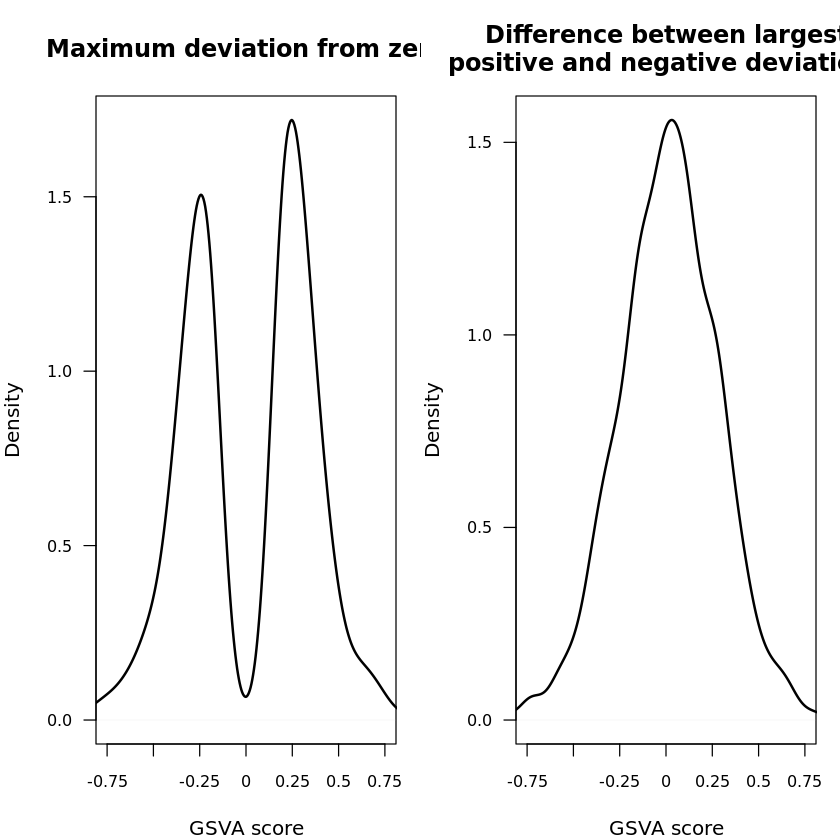

In [66]:
par(mfrow=c(1,2), mar=c(4, 4, 4, 1))
plot(density(as.vector(es.max)), main="Maximum deviation from zero",
     xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)
axis(1, at=seq(-0.75, 0.75, by=0.25), labels=seq(-0.75, 0.75, by=0.25), cex.axis=0.8)

plot(density(as.vector(es.dif)), main="Difference between largest\npositive and negative deviations",
     xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)
axis(1, at=seq(-0.75, 0.75, by=0.25), labels=seq(-0.75, 0.75, by=0.25), cex.axis=0.8)

In [67]:
adjPvalueCutoff <- 0.05

fit <- lmFit(es.max, design)
fit <- contrasts.fit(fit, contrasts=contr.matrix)
fit <- eBayes(fit)

allGeneSets_Nkx2_Foxa2_Cdx2 <- topTable(fit, coef="Nkx2_Foxa2_Cdx2", number=Inf)
DEgeneSets_Nkx2_Foxa2_Cdx2 <- topTable(fit, coef="Nkx2_Foxa2_Cdx2", number=Inf,
                       p.value=adjPvalueCutoff, adjust="BH")
res <- decideTests(fit, p.value=adjPvalueCutoff)
summary(res)

       Nkx2 Nkx2_Foxa2_Cdx2 Non_meta_vs_Meta Nkx2_Foxa2_Cdx2_vs_Meta
Down      0              11               51                       3
NotSig  266             192              183                     235
Up        0              63               32                      28

In [68]:
head(allGeneSets_Nkx2_Foxa2_Cdx2)
DEgeneSets_Nkx2_Foxa2_Cdx2

,logFC,AveExpr,t,P.Value,adj.P.Val,B
KHETCHOUMIAN_TRIM24_TARGETS_DN,-1.470701,0.01629034,-11.604535,0.000006099982,0.001622595,4.667738
BOYLAN_MULTIPLE_MYELOMA_PCA1_DN,1.484728,-0.04100322,10.455099,0.000012503103,0.001662913,3.929376
MUELLER_X_LINKED_COPY_NUMBER_DN,-1.534727,0.03535426,-9.490060,0.000024166975,0.002005071,3.241662
THUM_MIR21_TARGETS_HEART_DISEASE_DN,1.204316,-0.04451959,9.183997,0.000030151443,0.002005071,3.009003
YU_MYC_TARGETS_UP,1.005032,-0.02493282,7.856186,0.000085216411,0.004150454,1.906817
THUM_MIR21_TARGETS_HEART_DISEASE_UP,1.217126,0.01253388,7.744307,0.000093619261,0.004150454,1.806395


,logFC,AveExpr,t,P.Value,adj.P.Val,B
KHETCHOUMIAN_TRIM24_TARGETS_DN,-1.4707014,0.016290340,-11.604535,0.000006099982,0.001622595,4.66773815
BOYLAN_MULTIPLE_MYELOMA_PCA1_DN,1.4847278,-0.041003224,10.455099,0.000012503103,0.001662913,3.92937550
MUELLER_X_LINKED_COPY_NUMBER_DN,-1.5347268,0.035354263,-9.490060,0.000024166975,0.002005071,3.24166170
THUM_MIR21_TARGETS_HEART_DISEASE_DN,1.2043161,-0.044519593,9.183997,0.000030151443,0.002005071,3.00900268
YU_MYC_TARGETS_UP,1.0050320,-0.024932816,7.856186,0.000085216411,0.004150454,1.90681713
THUM_MIR21_TARGETS_HEART_DISEASE_UP,1.2171262,0.012533880,7.744307,0.000093619261,0.004150454,1.80639487
MODY_HIPPOCAMPUS_NEONATAL,0.9600756,-0.003552901,7.423691,0.000123339389,0.004686897,1.51147863
BERENJENO_TRANSFORMED_BY_RHOA_FOREVER_DN,1.0353510,-0.008452533,7.008451,0.000178823939,0.005945896,1.11307932
MORI_IMMATURE_B_LYMPHOCYTE_DN,0.8554996,-0.032121777,6.630094,0.000254676146,0.006925358,0.73293277
YAO_TEMPORAL_RESPONSE_TO_PROGESTERONE_CLUSTER_4,1.0329622,-0.138019239,6.607033,0.000260351809,0.006925358,0.70921177


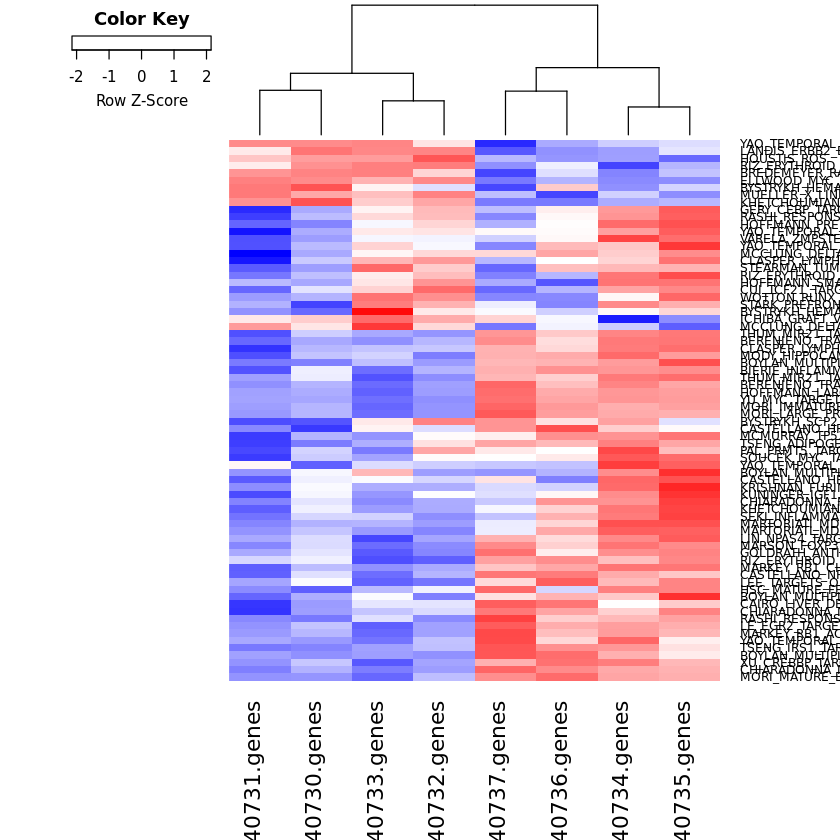

In [69]:
DEgeneSets_Nkx2_Foxa2_Cdx2.topgenes <- rownames(DEgeneSets_Nkx2_Foxa2_Cdx2)
i <- which(rownames(es.dif) %in% DEgeneSets_Nkx2_Foxa2_Cdx2.topgenes)

mycol <- colorpanel(1000,"blue","white","red")

heatmap.2(es.dif[i,], scale="row",
   labRow=rownames(es.dif)[i], labCol=colnames(es.dif), 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

In [70]:
allGeneSets_Nkx2_Foxa2_Cdx2_vs_Meta <- topTable(fit, coef="Nkx2_Foxa2_Cdx2_vs_Meta", number=Inf)
DEgeneSets_Nkx2_Foxa2_Cdx2_vs_Meta <- topTable(fit, coef="Nkx2_Foxa2_Cdx2_vs_Meta", number=Inf,
                       p.value=adjPvalueCutoff, adjust="BH")

In [71]:
head(allGeneSets_Nkx2_Foxa2_Cdx2_vs_Meta)
DEgeneSets_Nkx2_Foxa2_Cdx2_vs_Meta

,logFC,AveExpr,t,P.Value,adj.P.Val,B
YAO_TEMPORAL_RESPONSE_TO_PROGESTERONE_CLUSTER_3,0.8194614,0.1118581,6.873601,0.0002024951,0.01864062,1.2545228
MARSON_FOXP3_TARGETS_STIMULATED_UP,0.8945356,0.1678361,6.392046,0.0003206401,0.01864062,0.7975597
CUI_TCF21_TARGETS_DN,0.8352281,0.1203039,6.390851,0.0003210162,0.01864062,0.7963877
LANDIS_BREAST_CANCER_PROGRESSION_UP,0.8215274,0.1087839,6.380888,0.0003241707,0.01864062,0.7866098
MORI_PLASMA_CELL_DN,0.8035545,0.0314848,6.278155,0.0003587976,0.01864062,0.6850027
YAO_TEMPORAL_RESPONSE_TO_PROGESTERONE_CLUSTER_4,0.9397578,-0.1380192,6.010878,0.0004699080,0.01864062,0.4138398


,logFC,AveExpr,t,P.Value,adj.P.Val,B
YAO_TEMPORAL_RESPONSE_TO_PROGESTERONE_CLUSTER_3,0.8194614,0.11185807,6.873601,0.0002024951,0.01864062,1.25452282
MARSON_FOXP3_TARGETS_STIMULATED_UP,0.8945356,0.16783606,6.392046,0.0003206401,0.01864062,0.79755969
CUI_TCF21_TARGETS_DN,0.8352281,0.12030387,6.390851,0.0003210162,0.01864062,0.79638771
LANDIS_BREAST_CANCER_PROGRESSION_UP,0.8215274,0.10878385,6.380888,0.0003241707,0.01864062,0.78660977
MORI_PLASMA_CELL_DN,0.8035545,0.03148480,6.278155,0.0003587976,0.01864062,0.68500275
YAO_TEMPORAL_RESPONSE_TO_PROGESTERONE_CLUSTER_4,0.9397578,-0.13801924,6.010878,0.0004699080,0.01864062,0.41383983
HOFFMANN_SMALL_PRE_BII_TO_IMMATURE_B_LYMPHOCYTE_UP,0.6894161,0.01389928,5.794994,0.0005879867,0.01864062,0.18743357
RIZ_ERYTHROID_DIFFERENTIATION_HEMGN,0.6673128,0.04257679,5.693784,0.0006544451,0.01864062,0.07896195
CASTELLANO_NRAS_TARGETS_UP,0.7078701,0.11473558,5.588597,0.0007324950,0.01864062,-0.03537444
CHESLER_BRAIN_QTL_TRANS,-1.1476932,-0.09192911,-5.549082,0.0007644454,0.01864062,-0.07875352


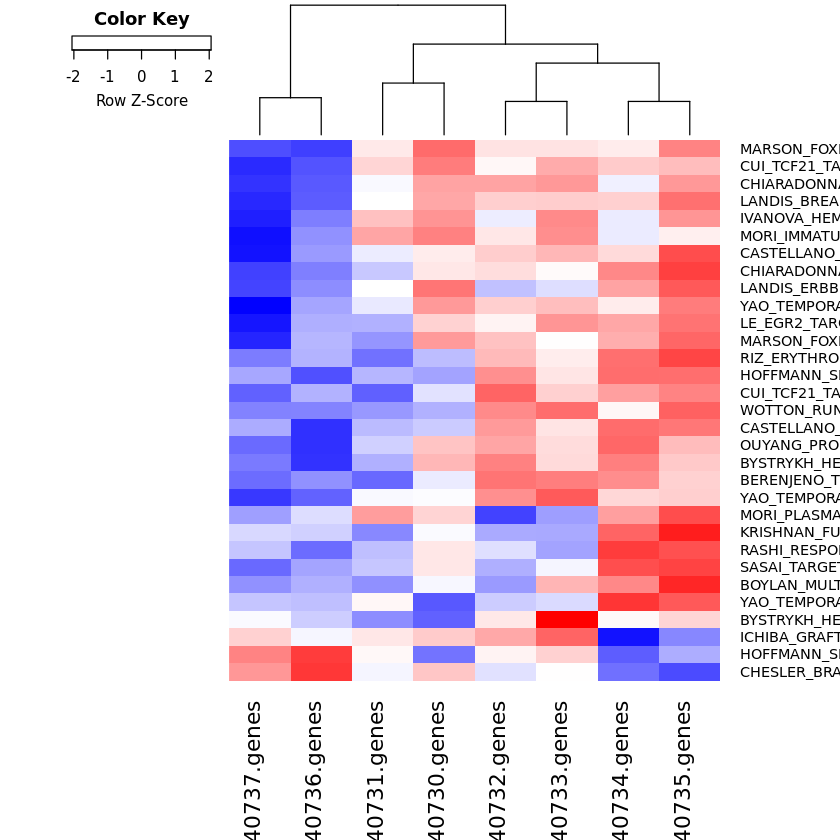

In [72]:
DEgeneSets_Nkx2_Foxa2_Cdx2_vs_Meta.topgenes <- rownames(DEgeneSets_Nkx2_Foxa2_Cdx2_vs_Meta)
i <- which(rownames(es.dif) %in% DEgeneSets_Nkx2_Foxa2_Cdx2_vs_Meta.topgenes)

mycol <- colorpanel(1000,"blue","white","red")

heatmap.2(es.dif[i,], scale="row",
   labRow=rownames(es.dif)[i], labCol=colnames(es.dif), 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

## Citation

Law CW, Alhamdoosh M, Su S et al. RNA-seq analysis is easy as 1-2-3 with limma, Glimma and edgeR [version 3; peer review: 3 approved]. F1000Research 2018, 5:1408